In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston=load_boston()

x=boston.data
y=boston.target
print(x.shape,y.shape)

(506, 13) (506,)


In [3]:

ones = np.ones((x.shape[0],1))
print(ones.shape)
x=np.array(x)
print(x.shape)
X=np.column_stack((ones,x))
X=(X-X.mean())/X.std()
print(X.shape)

(506, 1)
(506, 13)
(506, 14)


In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [5]:
print(x_train.shape,y_train.shape)
m=x_train.shape[0]
n=x_train.shape[1]
print(m,n)

(404, 14) (404,)
404 14


In [9]:
def hypothesis(x,theta):
    return np.dot(theta,x)


def gradient(X,Y,theta):
    grad=np.zeros((n,))
    
    for i in range(m):
        for j in range(n):
            grad[j]+=(hypothesis(X[i],theta)-Y[i])*X[i][j]
            
    return grad/m

def error(X,Y,theta):
    err=0
    
    for i in range(m):
        err+=(hypothesis(X[i],theta)-Y[i])**2
    
    return 0.5*err/m

def gradientdescent(X,Y,lr=0.001,threshhold=0.01):
    theta=np.full((n,), 0.1)
    error_list=[]
    
    for i in range(800):
        
        e=error(X,Y,theta)
        error_list.append(e)
        #if error_list[-2]-error_list[-1]<=threshhold:
            #break
        for j in range(n):
            grad=gradient(X,Y,theta)
            theta[j]=theta[j]-lr*grad[j]
            
    return theta,error_list
            
        

In [10]:
final_theta,error=gradientdescent(x_train,y_train)

In [11]:
print(final_theta)

[-1.16058602 -1.31265774 -0.44381712 -1.17131741 -1.17534795 -1.17137214
 -1.0285433  -0.49380907 -1.0678783  -1.22345356  1.36377604 -0.87838236
  6.39919594 -1.21208546]


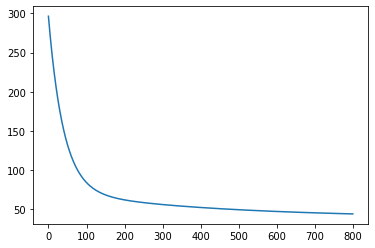

In [12]:
plt.plot(error)